In [1]:
import os
import sys

%load_ext autoreload
%autoreload 2

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiments.auto_vs_human.paranlu_auto import roberta_specialized_automatic, roberta_specialized

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 34543.77it/s]


In [2]:
from experiments.auto_vs_human.surface_form_metrics.lex_syn_sem import read_result_jsons
from utils import write_json, PROJECT_ROOT_DIR, load_json

[nltk_data] Downloading package benepar_en3 to
[nltk_data]     /nfshomes/nehasrik/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!


In [3]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy

### Lexical Diversity: Auto vs. Human Paraphrases

anli-auto
anli-human
atomic-auto
atomic-human
snli-auto
snli-human
social-auto
social-human

#### anli ####
Summary:
	Mean: auto=0.25036837792636296, human=0.35255268970085035
	Median: auto=0.2507936507936508, human=0.3443817710067709
	Min: auto=0.0, human=0.08545918367346939
	Max: auto=0.6354938271604937, human=0.6632539682539682
T-Test: Ttest_indResult(statistic=-34.743142593955554, pvalue=3.6692071479842496e-234)



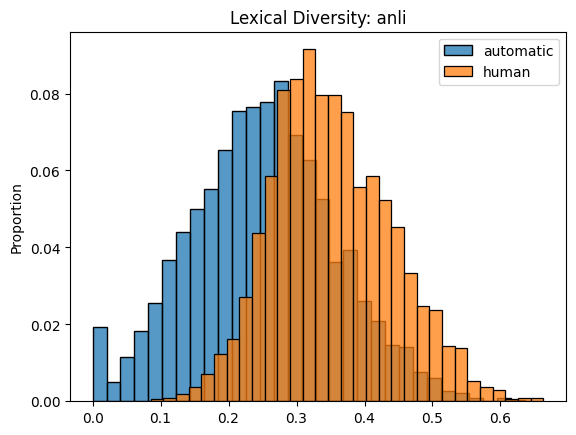

#### atomic ####
Summary:
	Mean: auto=0.3040396581297525, human=0.3689061560077507
	Median: auto=0.2957135189019247, human=0.35936507936507933
	Min: auto=0.0, human=0.0
	Max: auto=0.7739393939393938, human=0.839572192513369
T-Test: Ttest_indResult(statistic=-14.662171176512375, pvalue=2.750295565047691e-47)



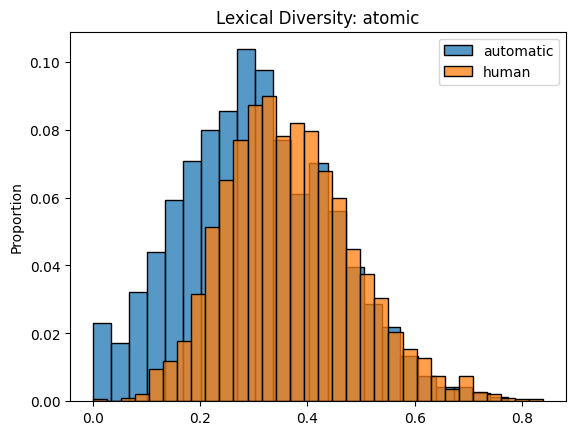

#### snli ####
Summary:
	Mean: auto=0.24097422644821526, human=0.3440808490201174
	Median: auto=0.2309178743961352, human=0.33529411764705874
	Min: auto=0.0, human=0.015873015873015817
	Max: auto=0.8483091787439613, human=0.8571428571428572
T-Test: Ttest_indResult(statistic=-26.966253274324824, pvalue=4.74055176162679e-146)



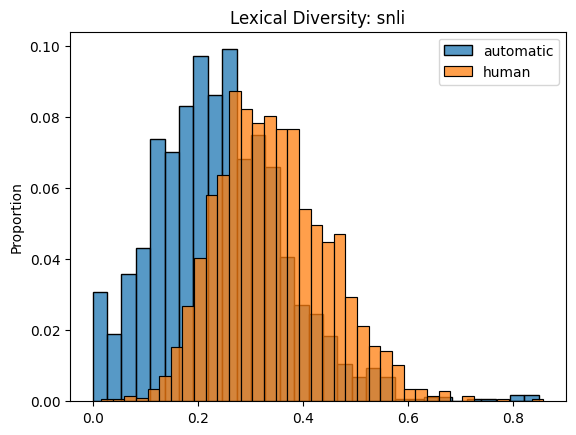

#### social ####
Summary:
	Mean: auto=0.3078017177357655, human=0.39906034152758457
	Median: auto=0.3069231019606959, human=0.3936285936285936
	Min: auto=0.0, human=0.06766917293233088
	Max: auto=0.8117647058823529, human=0.7888888888888889
T-Test: Ttest_indResult(statistic=-20.72094371639509, pvalue=4.331443232677201e-90)



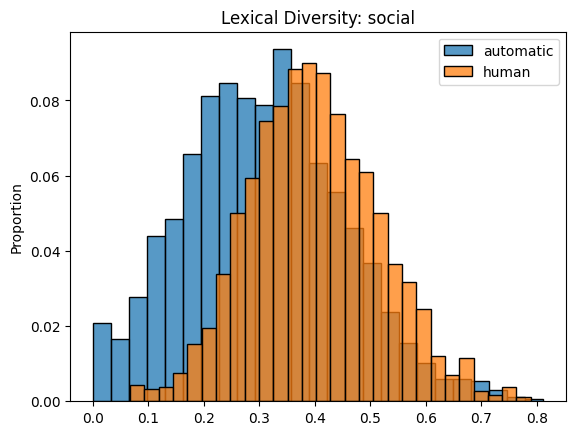

In [4]:
lex_results = read_result_jsons('experiments/auto_vs_human/surface_form_metrics/results/lexical', 'lex')
print()
for dataset, (auto, human) in lex_results.items():
    print(f'#### {dataset} ####')
    
    print(f'Summary:\n\tMean: auto={np.mean(auto)}, human={np.mean(human)}\n\tMedian: auto={np.median(auto)}, human={np.median(human)}\n\tMin: auto={np.min(auto)}, human={np.min(human)}\n\tMax: auto={np.max(auto)}, human={np.max(human)}')

    print('T-Test:', scipy.stats.ttest_ind(auto, human))
    print()
    plt.figure()
    sns.histplot(data=auto, stat='proportion', label='automatic')
    sns.histplot(data=human, stat='proportion', label='human')
    plt.title(f'Lexical Diversity: {dataset}')  # Add a title to distinguish plots
    plt.legend()
    plt.show()

### Syntactic Diversity: Auto vs. Human Paraphrases

anli-auto
anli-human
atomic-auto
atomic-human
snli-auto
snli-human
social-auto
social-human
#### anli ####
Summary:
	Mean: auto=0.20306747448806486, human=0.26805719086746155
	Median: auto=0.1997255840135097, human=0.27153608001905216
	Min: auto=0.0, human=0.0
	Max: auto=0.5718954248366013, human=0.6109022556390977
T-Test: Ttest_indResult(statistic=-17.974293653496453, pvalue=8.756095753138694e-70)



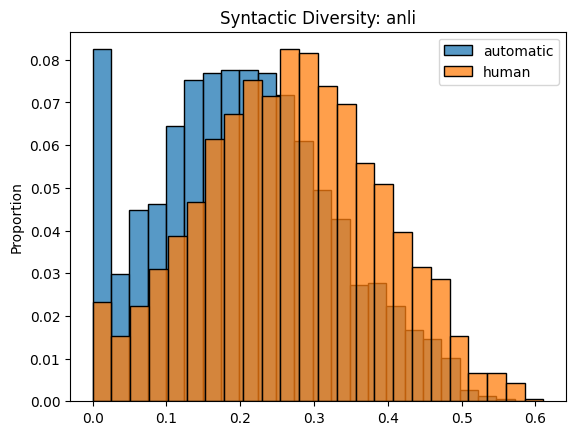

#### atomic ####
Summary:
	Mean: auto=0.19205160636404642, human=0.22413376992850817
	Median: auto=0.1875, human=0.2222222222222222
	Min: auto=0.0, human=0.0
	Max: auto=0.6875, human=0.6818181818181818
T-Test: Ttest_indResult(statistic=-6.6782018606727505, pvalue=2.8015594124074572e-11)



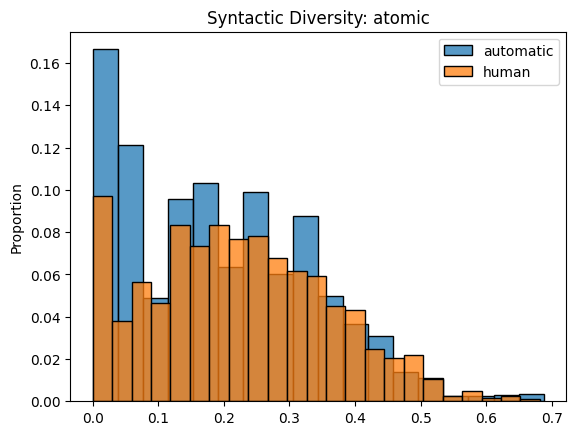

#### snli ####
Summary:
	Mean: auto=0.18528977712456107, human=0.2459665522480339
	Median: auto=0.17391304347826086, human=0.25
	Min: auto=0.0, human=0.0
	Max: auto=0.6923076923076923, human=0.625
T-Test: Ttest_indResult(statistic=-12.726012544714665, pvalue=2.5367706004659828e-36)



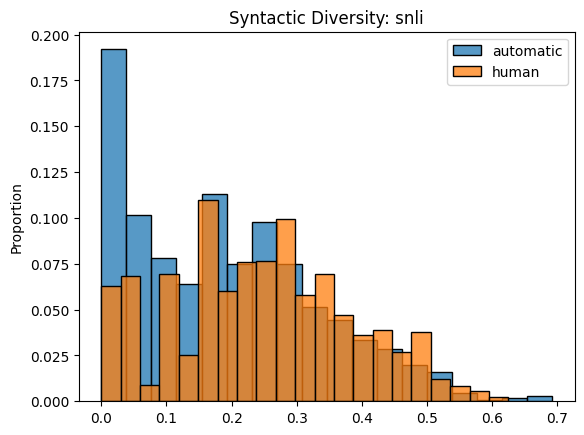

#### social ####
Summary:
	Mean: auto=0.22245307441583187, human=0.24465327904058262
	Median: auto=0.21428571428571427, human=0.23529411764705882
	Min: auto=0.0, human=0.0
	Max: auto=0.6666666666666666, human=0.6666666666666666
T-Test: Ttest_indResult(statistic=-4.09554126027495, pvalue=4.306561037052037e-05)



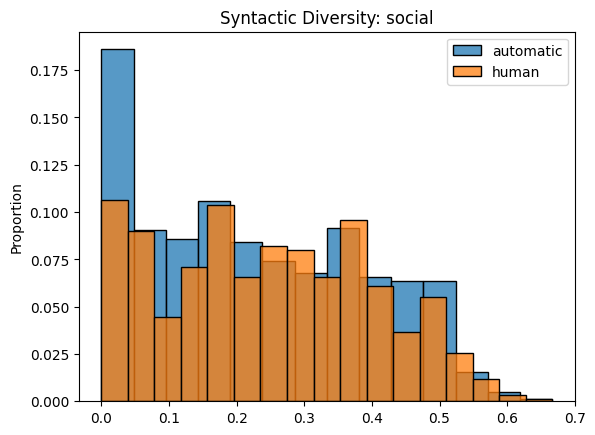

In [5]:
syn_results = read_result_jsons('experiments/auto_vs_human/surface_form_metrics/results/syntactic', 'syn')
for dataset, (auto, human) in syn_results.items():
    print(f'#### {dataset} ####')

    print(f'Summary:\n\tMean: auto={np.mean(auto)}, human={np.mean(human)}\n\tMedian: auto={np.median(auto)}, human={np.median(human)}\n\tMin: auto={np.min(auto)}, human={np.min(human)}\n\tMax: auto={np.max(auto)}, human={np.max(human)}')
    print('T-Test:', scipy.stats.ttest_ind(auto, human))
    print()
    plt.figure()
    sns.histplot(data=auto, stat='proportion', label='automatic')
    sns.histplot(data=human, stat='proportion', label='human')
    plt.title(f'Syntactic Diversity: {dataset}')  # Add a title to distinguish plots
    plt.legend()
    plt.show()

### Semantic Similarity: Auto vs. Human Paraphrases

anli-auto
anli-human
atomic-auto
atomic-human
snli-auto
snli-human
social-auto
social-human
#### anli ####
Summary:
	Mean: auto=0.7426903655272961, human=0.639835319108018
	Median: auto=0.7846316546201706, human=0.682329386472702
	Min: auto=0.11619783937931061, human=0.028088304214179516
	Max: auto=0.953078031539917, human=0.9300999939441681
T-Test: Ttest_indResult(statistic=20.463163594507193, pvalue=5.2319247229380925e-89)



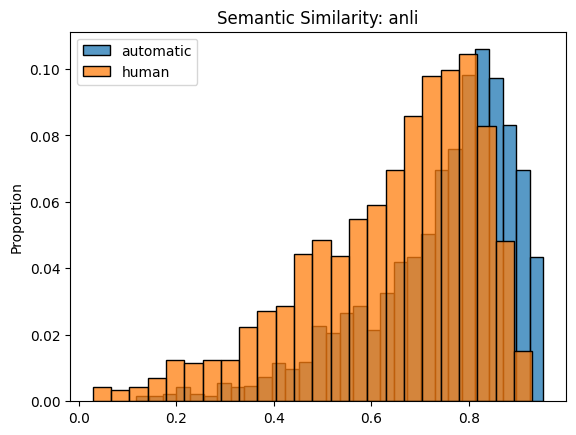

#### atomic ####
Summary:
	Mean: auto=0.6672328248881257, human=0.5872372553981302
	Median: auto=0.7477311789989471, human=0.6467471718788147
	Min: auto=0.015999693423509598, human=0.009432435035705566
	Max: auto=0.9544762372970581, human=0.9485592246055603
T-Test: Ttest_indResult(statistic=9.561985163291249, pvalue=2.101901481717213e-21)



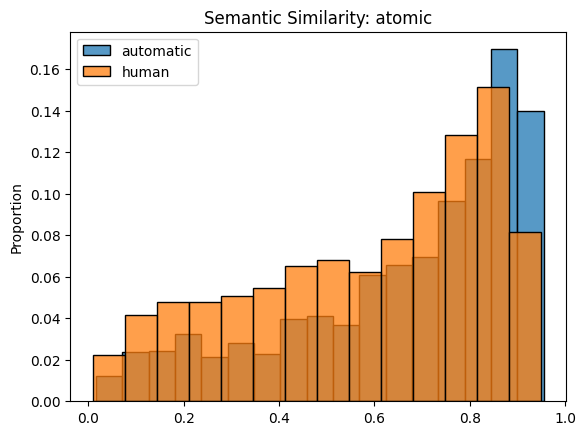

#### snli ####
Summary:
	Mean: auto=0.7631412326154801, human=0.6740114137991284
	Median: auto=0.832897424697876, human=0.7460236847400665
	Min: auto=0.02730010263621807, human=0.017915237694978714
	Max: auto=0.9561594724655151, human=0.9453539848327637
T-Test: Ttest_indResult(statistic=13.209030548422424, pvalue=6.167658838813186e-39)



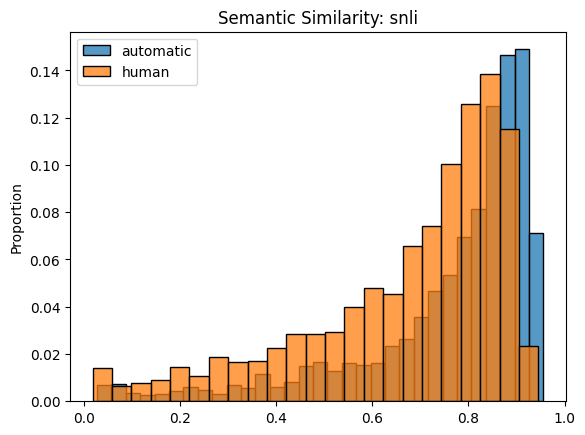

#### social ####
Summary:
	Mean: auto=0.7012429086798229, human=0.601353616287744
	Median: auto=0.7770059406757355, human=0.6775909066200256
	Min: auto=0.01535472460091114, human=0.01754445768892765
	Max: auto=0.9552991390228271, human=0.9510561227798462
T-Test: Ttest_indResult(statistic=12.578344841330077, pvalue=1.5949398463354258e-35)



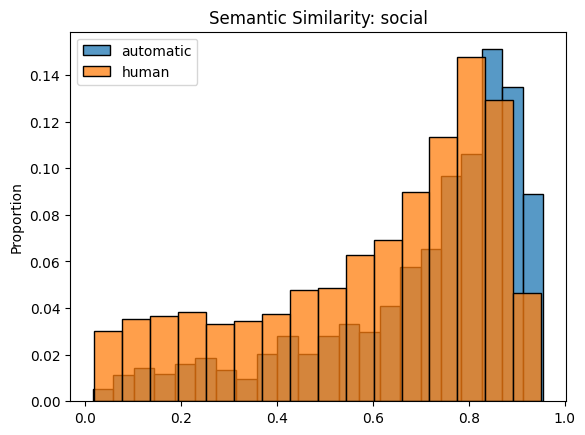

In [9]:
sem_results = read_result_jsons('experiments/auto_vs_human/surface_form_metrics/results/semantic', 'sem')
for dataset, (auto, human) in sem_results.items():
    print(f'#### {dataset} ####')

    print(f'Summary:\n\tMean: auto={np.mean(auto)}, human={np.mean(human)}\n\tMedian: auto={np.median(auto)}, human={np.median(human)}\n\tMin: auto={np.min(auto)}, human={np.min(human)}\n\tMax: auto={np.max(auto)}, human={np.max(human)}')
    print('T-Test:', scipy.stats.ttest_ind(auto, human))
    print()
    plt.figure()
    sns.histplot(data=auto, stat='proportion', label='automatic')
    sns.histplot(data=human, stat='proportion', label='human')
    plt.title(f'Semantic Similarity: {dataset}')  # Add a title to distinguish plots
    plt.legend()
    plt.show()

In [ ]:
stats.pearsonr(
    [p['pred_conf_shift'] for bucket in abductive_bucket_preds.values() for p in bucket['bucket_confidences']],
    [p['syntactic_distance'] for bucket in abductive_bucket_preds.values() for p in bucket['bucket_confidences']]
)